# Step 1: Import relevant packages

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

# Step 2: Load the Fashion-MNIST dataset

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


# Step 3: Take a subset of the data set (3,000 for training and 1,000 for testing)
# Step 4: Perform necessary reshaping of the data for the classifiers

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=1000,train_size=3000)
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)
print(X_train.shape,X_test.shape)
Y_train = Y_train.reshape(Y_train.shape[0])
Y_test =Y_test.reshape(Y_test.shape[0])
print(Y_train.shape,Y_test.shape)

(3000, 784) (1000, 784)
(3000,) (1000,)


# Step 5: Initialise the classifier model

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier()
sgd = SGDClassifier(max_iter=250)

# Step 6: Fit the model to the training data

In [54]:
knn.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
sgd.fit(X_train,Y_train)

SGDClassifier(max_iter=250)

# Step 7: Use the trained/fitted model to evaluate the testing data

In [55]:
print('KNN:')
print(knn.predict(X_test))
print('DT:')
print(dt.predict(X_test))
print('SGD:')
print(sgd.predict(X_test))

KNN:
[3 2 3 7 9 8 7 9 2 1 9 4 8 8 6 7 5 8 5 3 9 9 1 1 0 6 8 1 7 2 3 5 7 7 6 6 1
 2 5 6 4 4 6 8 4 3 2 2 2 6 3 4 2 4 3 0 2 9 6 4 1 0 9 2 7 4 3 2 6 0 7 3 3 3
 4 3 8 9 2 4 2 4 5 0 5 7 2 3 9 6 5 4 7 7 3 9 5 3 2 1 0 8 3 2 1 0 3 8 6 4 7
 3 2 7 8 6 7 5 7 1 2 0 7 7 9 7 2 6 8 7 7 6 3 8 4 9 5 6 3 9 0 8 4 1 6 0 1 7
 1 9 3 0 6 7 6 2 7 5 6 5 4 1 3 9 6 7 6 8 8 0 7 3 3 0 3 5 9 2 8 7 5 1 0 2 6
 1 0 6 8 0 8 0 3 1 9 5 3 1 3 9 2 2 6 5 6 6 2 2 2 1 8 6 9 4 1 7 0 9 7 7 9 2
 8 3 6 2 7 6 2 1 3 0 6 4 1 6 5 1 7 5 5 6 4 7 9 2 3 6 3 1 2 0 9 1 1 1 1 5 1
 6 0 2 6 7 3 2 6 7 0 3 7 1 0 8 8 2 7 8 8 8 4 2 0 1 6 8 3 9 9 3 8 5 4 6 8 0
 9 1 5 4 0 7 3 4 7 2 2 1 7 0 7 1 4 0 1 9 1 7 5 0 5 5 0 0 8 6 2 5 2 5 2 2 1
 6 9 2 8 6 0 4 3 7 0 5 9 0 4 8 2 4 5 7 7 0 2 2 5 0 1 3 7 9 4 0 2 0 9 8 0 6
 8 8 6 8 4 7 6 3 0 4 0 3 2 0 4 6 0 8 1 0 3 0 3 6 6 8 6 6 3 7 8 6 2 9 2 7 4
 4 1 0 1 9 7 2 4 8 4 6 3 4 3 6 6 2 2 9 2 3 6 2 5 3 8 6 0 1 4 9 1 1 7 0 5 0
 8 0 0 3 4 1 9 2 8 6 6 4 7 1 2 3 1 4 0 3 1 3 7 0 9 7 4 4 7 0 6 0 0 9 3 3 1
 8 9 5 9 4 0 3 9 3 0

# Step 8: Report the performance of each classifier
Use standard classification metrics such as accuracy, precision, recall, and the F1-score:

In [56]:
scoring_list = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
for i in scoring_list:
    print(f'{i}:')
    print('KNN:', end='')
    print(np.mean(cross_val_score(knn, X_test, Y_test,scoring=i)))
    print('DT:', end='')
    print(np.mean(cross_val_score(dt, X_test, Y_test,scoring=i)))
    print('SGD:', end='')
    print(np.mean(cross_val_score(sgd, X_test, Y_test,scoring=i)))

accuracy:
KNN:0.732
DT:0.683
SGD:0.782
precision_weighted:
KNN:0.7465672842427911
DT:0.6805155211200085
SGD:0.7774571717758956
recall_weighted:
KNN:0.732
DT:0.674
SGD:0.7829999999999999
f1_weighted:
KNN:0.7293195558575343
DT:0.6869689591302688
SGD:0.753665570652905


Use the confusion matrix:

In [57]:
Y_pred1 = knn.predict(X_test)
Y_pred2 = dt.predict(X_test)
Y_pred3 = sgd.predict(X_test)
print('KNN:')
print(confusion_matrix(Y_test, Y_pred1))
print('DT:')
print(confusion_matrix(Y_test, Y_pred2))
print('SGD:')
print(confusion_matrix(Y_test, Y_pred3))

KNN:
[[ 83   0   2   2   0   0  13   0   1   0]
 [  0 103   1   0   0   0   1   0   0   0]
 [  6   0  70   1  13   0  15   0   0   0]
 [  8   2   2  87   2   0   3   0   0   0]
 [  2   0  13   5  53   0  16   0   0   0]
 [  0   0   0   1   0  69   0  23   1   9]
 [ 16   0  16   4   9   0  62   0   2   0]
 [  0   0   0   0   0   1   0  86   0   8]
 [  1   0   4   1   0   0   1   0  95   0]
 [  0   0   1   0   0   0   0   6   0  80]]
DT:
[[ 69   3   3   6   0   1  17   0   2   0]
 [  1 101   0   0   1   0   0   0   2   0]
 [  5   2  60   2  20   0  15   0   0   1]
 [  8   9   2  70   6   0   6   0   3   0]
 [  0   2  15  12  47   0  13   0   0   0]
 [  1   1   1   0   0  77   0  12   2   9]
 [ 16   0  10   5  17   0  52   0   8   1]
 [  0   0   0   0   0   9   0  75   0  11]
 [  3   0   2   1   0   4   1   1  90   0]
 [  0   0   2   0   0   2   1  10   2  70]]
SGD:
[[76  1  1  5  0  0 14  0  4  0]
 [ 0 99  1  2  0  0  3  0  0  0]
 [ 6  2 53  1 11  0 32  0  0  0]
 [ 4  2  0 87  1  0  8  1

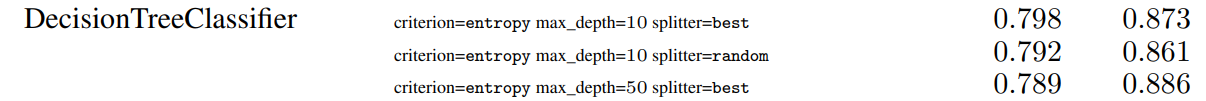

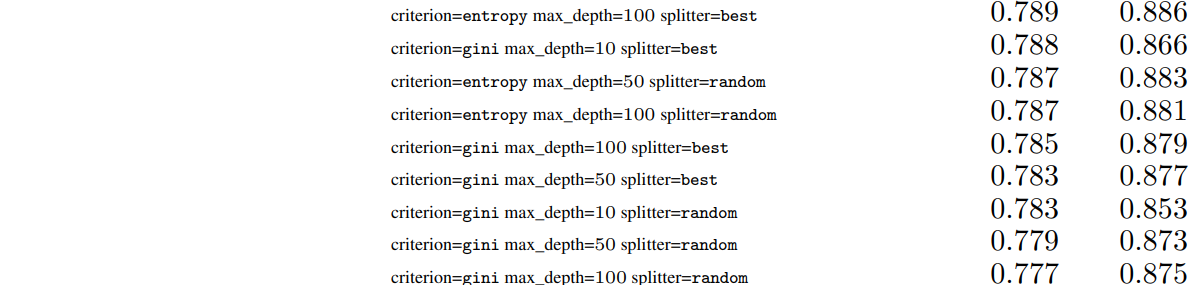
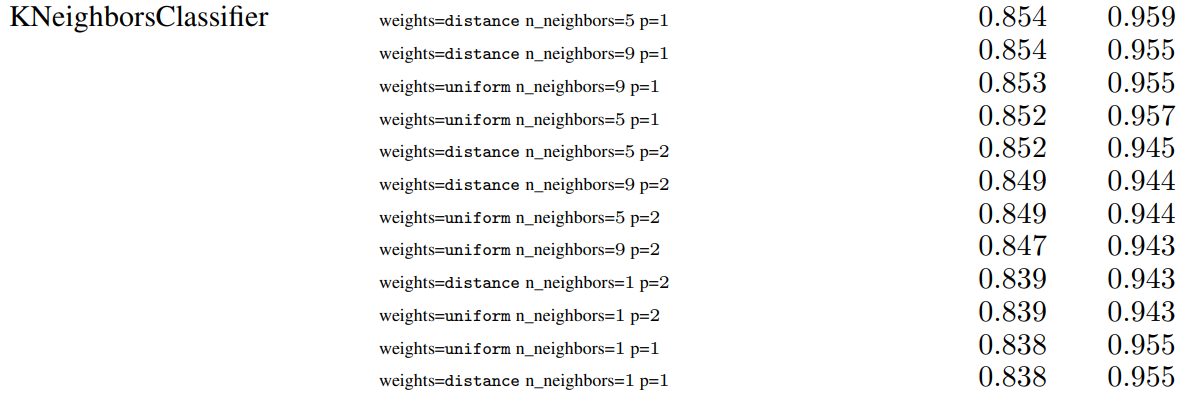
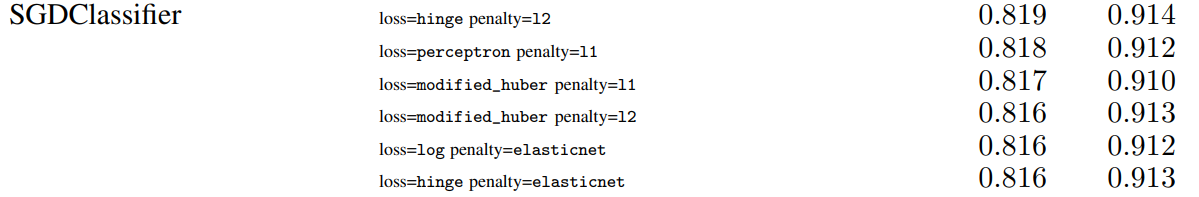
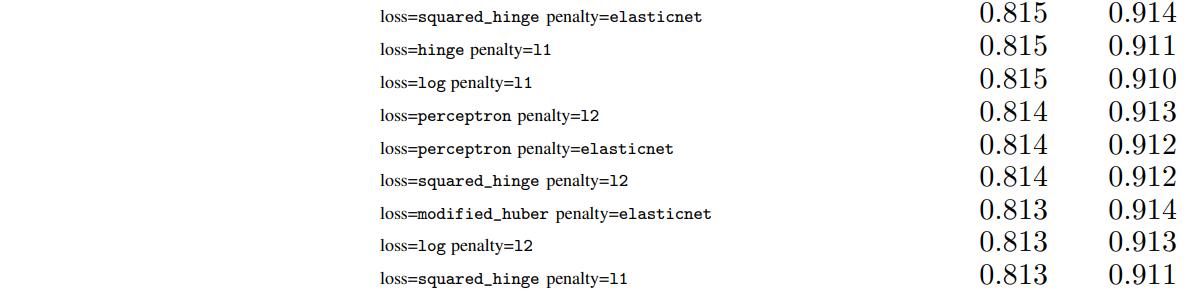

# Explanation:
The observation shows that the accuracy of this classifier is lower than that of the same type in this paper, which may be related to the degree of refinement of data pretreatment. In addition, the number of samples selected this time is not large enough, which may cause some accidental errors.